In [2]:
import pandas as pd;
import numpy as np;
from sklearn.metrics.pairwise import cosine_similarity;
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import normalize
from numpy import linalg as LA
from scipy.spatial.distance import euclidean, pdist, squareform
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

from scipy.stats import zscore

Loading the Data :

The key features for the identification of outliers are:

Loss Ratio : 
Total Repair cost against an ESB Contract/Total premium under the contract

Average parts repaired per contract :
 Average number of parts repaired under a contract   by a dealer for a vehicle
Repair cost ratio(6 months) : 
The total repair cost incurred in the last 6 months of the contract period vs the total repair cost for the entire period of the contract

Claim to contract ratio : 
Number of claims against a contract.

Concentration of part repair : 
Score computed as concentration of repair on a part by a dealer  in comparison with the repairs of other dealers, taking into account the average number of repairs warranted by the part.

Overcharged part cost : 
Score computed as the net cost of repairs charged above the average repair cost associated with a part across all parts repaired by the dealer across all contracts.


In [3]:
data = pd.read_excel(r'D:\Data Science\PROJECTS\MARKOV\APPU\INPUT.xlsx');
data

,Dealer_Code,STPR_STATE_C,PREM...AVERAGE.PARTS.REPAIRED.PER.VIN.CONTRACT,PREM...REPAIR.COST.RATIO...6.MONTHS.,PREM...SCORE...INDICATES.CONCENTRATION.OF.PART.REPAIR,PREM...LOSS.RATIO,PREM...SCORE.OVERCHARGED.PART.VALUE.OVERALL.BY.LOSS.RATIO.THRESHOLD,PREM...OVERALL.CLAIM.TO.CONTRACT.RATIO
0,4465,TX,2.200000,0.203222,14.444695,0.864211,39313.647575,1.343313
1,5536,CA,2.630435,0.126571,10.383767,0.996353,47601.353492,1.902041
2,2974,OH,4.409091,0.194189,1.217622,1.371735,4812.806301,3.310345
3,1970,OH,1.980519,0.213813,12.257855,0.394096,5583.213334,1.196875
4,48996,CA,3.146853,0.282184,10.412729,0.689888,16133.094660,2.675000
...,...,...,...,...,...,...,...,...
703,7820,CA,2.128205,0.203777,1.963121,0.751217,5337.574883,1.492308
704,4716,IN,2.349206,0.141968,1.285542,0.691978,7497.261253,1.294118
705,5065,KS,2.220339,0.149794,1.132601,0.572396,7436.145487,1.468750
706,1440,NV,2.378788,0.183206,1.814173,0.750025,5103.059153,1.385246


In [4]:
test = pd.read_excel(r'D:\Data Science\PROJECTS\MARKOV\APPU\INPUT.xlsx');

In [5]:
columns = ['Dealer_Code','STPR_STATE_C']



In [6]:
df = data.drop(columns, inplace=True, axis=1)

In [7]:
df=data

In [8]:
df

,PREM...AVERAGE.PARTS.REPAIRED.PER.VIN.CONTRACT,PREM...REPAIR.COST.RATIO...6.MONTHS.,PREM...SCORE...INDICATES.CONCENTRATION.OF.PART.REPAIR,PREM...LOSS.RATIO,PREM...SCORE.OVERCHARGED.PART.VALUE.OVERALL.BY.LOSS.RATIO.THRESHOLD,PREM...OVERALL.CLAIM.TO.CONTRACT.RATIO
0,2.200000,0.203222,14.444695,0.864211,39313.647575,1.343313
1,2.630435,0.126571,10.383767,0.996353,47601.353492,1.902041
2,4.409091,0.194189,1.217622,1.371735,4812.806301,3.310345
3,1.980519,0.213813,12.257855,0.394096,5583.213334,1.196875
4,3.146853,0.282184,10.412729,0.689888,16133.094660,2.675000
...,...,...,...,...,...,...
703,2.128205,0.203777,1.963121,0.751217,5337.574883,1.492308
704,2.349206,0.141968,1.285542,0.691978,7497.261253,1.294118
705,2.220339,0.149794,1.132601,0.572396,7436.145487,1.468750
706,2.378788,0.183206,1.814173,0.750025,5103.059153,1.385246


Normalizing the data(min max scaling) and applying PCA to obtain the first two principal components to plot the data in 2d.

In [9]:
normalized_df_pca=(df-df.min())/(df.max()-df.min())

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_df_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

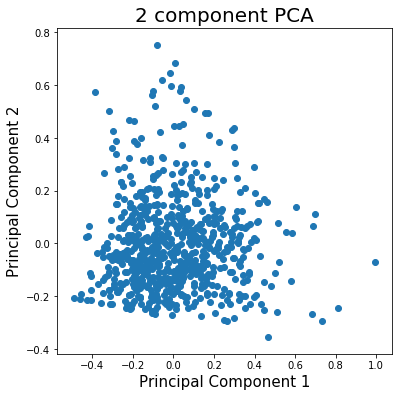

In [13]:

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principalDf['principal component 1'],principalDf['principal component 2'])

# Stochastic modelling to identify anomalies based on similarity

Similarity is computed as the inverse of the euclidean distance between two nodes.

The Similarity matrix is then computed as the number of high-similarity shared neighbors. 

For example, consider two objects, p1 andp2. Suppose p1 has a set of neighbors {p3, p4, p5, p7} and
p2 has a set of neighbors {p3, p4, p6, p7}.The set of neighbors shared by both p1 and p2 is {p3, p4,
p7}. In this algorithm, we take the cardinality of this set as the similarity measure.  

In order to define the shared neighbors we need to find the neighbors of a given object (i.e. adjacent nodes
of the graph representation). Here we limit the neighbors only to a set of nodes having high similarity values by
using a threshold to cutoff low similarity neighbors. By doing so, outliers will have a fewer number of nodes than
the normal objects in general

Let X be the set of cosine  similarity values. Let µ and σ be the mean and standard deviation of X respectively. Experimentally we found that any T value inside the interval [µ - σ, µ) gives higher detection rate (precision); i.e. T is any value within one standard deviation below the mean. 

In [14]:
def OUTRANK2(d,e):
    
    
    normalized_df=(df-df.min())/(df.max()-df.min())
        
    Similarity = 1/(1+squareform(pdist(normalized_df)))
    DEALERCOUNT = len(Similarity)
    x = np.array(Similarity.flatten())
    
    mean = np.mean(x)
    std = np.std(x)
    T = mean-(std/2)
    
    for i in range(1,DEALERCOUNT):
        for j in range(i+1,DEALERCOUNT):
            if Similarity[i][j]<T:
                Similarity[i][j]=0
                Similarity[j][i]=0
            else:
                Similarity[i][j]=1
                Similarity[j][i]=1
    SIM = np.matmul(Similarity,Similarity.T)
    np.fill_diagonal(SIM,0)
    return (OUTRANK1(d,e,SIM,DEALERCOUNT))
              
    
                    
                    

                    
            
            
            
                

In [15]:
def OUTRANK1(d,e,SIM,DEALERCOUNT):
    C = np.full((DEALERCOUNT,1),0.001425)
    N_SIM= normalize(SIM,axis=1,norm='l1')
    while(True):
        C1= (d*C) + (1-d)*(np.matmul(N_SIM.T,C))
        dif =C1-C
        delta = LA.norm(dif,1)
        C=C1
        if(delta<e):
            break
    
    return(C)

In [16]:
SCORE= OUTRANK2(0.1,0.00000000001)

In [17]:
SCORE.shape  

(708, 1)

In [18]:
SCORE

array([[8.49636989e-04],
       [1.47772329e-06],
       [1.33780068e-06],
       [2.53942606e-06],
       [4.78845275e-06],
       [1.41681925e-05],
       [1.47563515e-05],
       [1.59939715e-05],
       [2.23732480e-05],
       [2.24924410e-05],
       [2.45534260e-05],
       [2.47136322e-05],
       [5.96885430e-05],
       [6.08424529e-05],
       [6.77282412e-05],
       [6.84064585e-05],
       [7.24798557e-05],
       [8.77352253e-05],
       [9.05248511e-05],
       [9.72293836e-05],
       [1.11027765e-04],
       [1.16768038e-04],
       [1.23730716e-04],
       [1.26151940e-04],
       [1.31152288e-04],
       [1.32318459e-04],
       [1.42161078e-04],
       [1.63379475e-04],
       [1.68012080e-04],
       [2.26535557e-04],
       [2.43164090e-04],
       [2.65310387e-04],
       [2.66791766e-04],
       [2.77568616e-04],
       [2.98301971e-04],
       [3.10794149e-04],
       [3.13830256e-04],
       [3.20492864e-04],
       [3.23526925e-04],
       [3.24553347e-04],


In [19]:
test['SCORE']=SCORE

In [20]:
test

,Dealer_Code,STPR_STATE_C,PREM...AVERAGE.PARTS.REPAIRED.PER.VIN.CONTRACT,PREM...REPAIR.COST.RATIO...6.MONTHS.,PREM...SCORE...INDICATES.CONCENTRATION.OF.PART.REPAIR,PREM...LOSS.RATIO,PREM...SCORE.OVERCHARGED.PART.VALUE.OVERALL.BY.LOSS.RATIO.THRESHOLD,PREM...OVERALL.CLAIM.TO.CONTRACT.RATIO,SCORE
0,4465,TX,2.200000,0.203222,14.444695,0.864211,39313.647575,1.343313,0.000850
1,5536,CA,2.630435,0.126571,10.383767,0.996353,47601.353492,1.902041,0.000001
2,2974,OH,4.409091,0.194189,1.217622,1.371735,4812.806301,3.310345,0.000001
3,1970,OH,1.980519,0.213813,12.257855,0.394096,5583.213334,1.196875,0.000003
4,48996,CA,3.146853,0.282184,10.412729,0.689888,16133.094660,2.675000,0.000005
...,...,...,...,...,...,...,...,...,...
703,7820,CA,2.128205,0.203777,1.963121,0.751217,5337.574883,1.492308,0.001828
704,4716,IN,2.349206,0.141968,1.285542,0.691978,7497.261253,1.294118,0.001829
705,5065,KS,2.220339,0.149794,1.132601,0.572396,7436.145487,1.468750,0.001830
706,1440,NV,2.378788,0.183206,1.814173,0.750025,5103.059153,1.385246,0.001830


In [21]:
final=test.sort_values('SCORE',ascending=True)

In [41]:
final

,Dealer_Code,STPR_STATE_C,PREM...AVERAGE.PARTS.REPAIRED.PER.VIN.CONTRACT,PREM...REPAIR.COST.RATIO...6.MONTHS.,PREM...SCORE...INDICATES.CONCENTRATION.OF.PART.REPAIR,PREM...LOSS.RATIO,PREM...SCORE.OVERCHARGED.PART.VALUE.OVERALL.BY.LOSS.RATIO.THRESHOLD,PREM...OVERALL.CLAIM.TO.CONTRACT.RATIO,SCORE
2,2974,OH,4.409091,0.194189,1.217622,1.371735,4812.806301,3.310345,0.000001
1,5536,CA,2.630435,0.126571,10.383767,0.996353,47601.353492,1.902041,0.000001
3,1970,OH,1.980519,0.213813,12.257855,0.394096,5583.213334,1.196875,0.000003
4,48996,CA,3.146853,0.282184,10.412729,0.689888,16133.094660,2.675000,0.000005
5,8150,NJ,3.756098,0.077790,4.108032,1.606894,12821.278007,2.587302,0.000014
...,...,...,...,...,...,...,...,...,...
703,7820,CA,2.128205,0.203777,1.963121,0.751217,5337.574883,1.492308,0.001828
704,4716,IN,2.349206,0.141968,1.285542,0.691978,7497.261253,1.294118,0.001829
705,5065,KS,2.220339,0.149794,1.132601,0.572396,7436.145487,1.468750,0.001830
706,1440,NV,2.378788,0.183206,1.814173,0.750025,5103.059153,1.385246,0.001830


The index is the rank of the outlier with 1 being the most probable outlier.

In [35]:
Result = final[['Dealer_Code','SCORE']].reset_index()
del Result['index']
Result

,Dealer_Code,SCORE
0,2974,0.000001
1,5536,0.000001
2,1970,0.000003
3,48996,0.000005
4,8150,0.000014
...,...,...
703,7820,0.001828
704,4716,0.001829
705,5065,0.001830
706,1440,0.001830


# Top Ten Potential Anomaly Dealers

In [52]:
Top_ten = Result.head(10)
Top_ten

,Dealer_Code,SCORE
0,2974,0.000001
1,5536,0.000001
2,1970,0.000003
3,48996,0.000005
4,8150,0.000014
5,48996,0.000015
6,4515,0.000016
7,48996,0.000022
8,7530,0.000022
9,4570,0.000025


# Computing Net Potential Loss

This is done by computing the net amount of overcharge the dealer has incurred for each repair and summing up for all his repairs. This exercise is done for the top ten dealers

In [37]:
Loss_data =  pd.read_excel(r'C:\Users\Supreme Leader\Desktop\Regression Assignment\Assignment 1\Net Loss computation for all dealers.xlsx');
#Loss_data = Loss_data[['Dealer_Code','DEALER+STATE-SCORE OVERCHARGED PART -OVERALL VALUE','OVERALL VALUE BY LOSS RATIO THRESHOLD']]

In [42]:
final.rename(columns={'PREM...AVERAGE.PARTS.REPAIRED.PER.VIN.CONTRACT': 'AVERAGE-PARTS REPAIRED PER VIN+CONTRACT'}, inplace=True)

In [49]:
Net_loss = final.merge(Loss_data, on=['Dealer_Code','AVERAGE-PARTS REPAIRED PER VIN+CONTRACT'], how='left')
Net_loss=Net_loss[['Dealer_Code','DEALER+STATE-SCORE OVERCHARGED PART -OVERALL VALUE','OVERALL VALUE BY LOSS RATIO THRESHOLD']]

# Net Potential Loss from Top Ten Dealers

In [51]:
Net_loss.head(10)

,Dealer_Code,DEALER+STATE-SCORE OVERCHARGED PART -OVERALL VALUE,OVERALL VALUE BY LOSS RATIO THRESHOLD
0,2974,4319.647478,4812.806301
1,5536,48848.201129,47601.353492
2,1970,2897.297614,5583.213334
3,48996,7552.516853,16133.094660
4,8150,12410.077019,12821.278007
5,48996,7390.061625,13665.801425
6,4515,25279.721384,41058.445854
7,48996,9207.705970,12017.171660
8,7530,14387.785400,13311.206130
9,4570,24172.741673,23931.611973


In [53]:
print ('NET POTENTIAL LOSS')

Net_loss.head(10)['DEALER+STATE-SCORE OVERCHARGED PART -OVERALL VALUE'].sum()

NET POTENTIAL LOSS


156465.7561457675

## Z_Score computation across all columns to validate the results obtained. The top dealers show high deviation( more than 3 s.d)
across multiple features.

In [191]:
df.apply(zscore)

,PREM...AVERAGE.PARTS.REPAIRED.PER.VIN.CONTRACT,PREM...REPAIR.COST.RATIO...6.MONTHS.,PREM...SCORE...INDICATES.CONCENTRATION.OF.PART.REPAIR,PREM...LOSS.RATIO,PREM...SCORE.OVERCHARGED.PART.VALUE.OVERALL.BY.LOSS.RATIO.THRESHOLD,PREM...OVERALL.CLAIM.TO.CONTRACT.RATIO
0,-0.035528,0.483340,8.164944,0.774681,6.013456,-0.002354
1,1.022450,-0.273477,5.641764,1.313444,7.503805,1.256808
2,5.394260,0.394144,-0.053444,2.843923,-0.190710,4.430597
3,-0.574996,0.587909,6.806193,-1.142036,-0.052170,-0.332372
4,2.291769,1.262962,5.659759,0.063945,1.844978,2.998768
...,...,...,...,...,...,...
703,-0.211995,0.488815,0.409757,0.313993,-0.096342,0.333423
704,0.331210,-0.121453,-0.011243,0.072468,0.292026,-0.113223
705,0.014463,-0.044184,-0.106270,-0.415082,0.281036,0.280333
706,0.403920,0.285705,0.317211,0.309131,-0.138515,0.092146
